In [1]:
# Import important libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Read CSV data file
all_data = pd.read_csv("data/vpn-non_vpn.csv")

# Confirm if data is correct
all_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,131.202.240.102-224.0.0.252-52268-5355-17,131.202.240.102,52268,224.0.0.252,5355,17,25/05/2015 10:32:20 PM,410493,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,non_vpn
1,10.0.2.15-64.4.23.162-15685-40019-17,10.0.2.15,15685,64.4.23.162,40019,17,06/06/2015 12:59:05 AM,8645898,2,4,...,0,717841.000000,0.000000,717841.0,717841.0,7.582491e+06,0.000000e+00,7582491.0,7582491.0,non_vpn
2,131.202.240.45-131.202.240.87-161-61992-17,131.202.240.87,61992,131.202.240.45,161,17,25/05/2015 10:26:43 PM,93682019,168,170,...,0,8126.666667,103.079258,8232.0,8026.0,2.892348e+07,1.861686e+06,30001130.0,26773792.0,non_vpn
3,131.202.240.185-224.0.0.252-62960-5355-17,131.202.240.185,62960,224.0.0.252,5355,17,25/05/2015 10:26:54 PM,410744,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,non_vpn
4,131.202.240.150-131.202.244.5-51557-53-17,131.202.240.150,51557,131.202.244.5,53,17,30/03/2015 06:12:04 PM,342,0,2,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,non_vpn


## Data Analysis

In [3]:
all_data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,15100.000000,15100.000000,15100.000000,1.510000e+04,15100.000000,15100.000000,1.510000e+04,1.510000e+04,15100.000000,15100.000000,...,15100.000000,15100.0,1.510000e+04,1.510000e+04,1.510000e+04,1.510000e+04,1.510000e+04,1.510000e+04,1.510000e+04,1.510000e+04
mean,38528.682781,6160.352384,14.282517,1.063989e+07,55.253444,59.383179,2.049243e+04,4.281924e+04,75.740066,11.914768,...,39.714901,0.0,1.863704e+05,1.157247e+05,3.569499e+05,9.548589e+04,3.470665e+06,4.701185e+05,3.918540e+06,3.069659e+06
std,20692.859071,13021.822816,4.835343,2.990688e+07,712.624499,723.160739,6.599299e+05,7.108985e+05,243.131013,28.488607,...,687.622992,0.0,1.360006e+06,1.040143e+06,2.655099e+06,8.841142e+05,1.241610e+07,3.436405e+06,1.361223e+07,1.181102e+07
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20680.750000,53.000000,17.000000,7.930000e+02,0.000000,1.000000,0.000000e+00,2.200000e+01,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45124.500000,443.000000,17.000000,1.311345e+05,1.000000,2.000000,0.000000e+00,1.750000e+02,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,55671.250000,5355.000000,17.000000,4.206040e+05,1.000000,2.000000,2.200000e+01,3.772500e+02,22.000000,22.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.000000,65381.000000,17.000000,1.200000e+08,31666.000000,31412.000000,4.131281e+07,4.099927e+07,2676.000000,520.000000,...,31659.000000,0.0,4.218478e+07,4.030572e+07,5.723106e+07,3.651485e+07,1.199938e+08,7.639863e+07,1.199938e+08,1.199938e+08


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            15100 non-null  object 
 1   Src IP             15100 non-null  object 
 2   Src Port           15100 non-null  int64  
 3   Dst IP             15100 non-null  object 
 4   Dst Port           15100 non-null  int64  
 5   Protocol           15100 non-null  int64  
 6   Timestamp          15100 non-null  object 
 7   Flow Duration      15100 non-null  int64  
 8   Tot Fwd Pkts       15100 non-null  int64  
 9   Tot Bwd Pkts       15100 non-null  int64  
 10  TotLen Fwd Pkts    15100 non-null  float64
 11  TotLen Bwd Pkts    15100 non-null  float64
 12  Fwd Pkt Len Max    15100 non-null  float64
 13  Fwd Pkt Len Min    15100 non-null  float64
 14  Fwd Pkt Len Mean   15100 non-null  float64
 15  Fwd Pkt Len Std    15100 non-null  float64
 16  Bwd Pkt Len Max    151

In [5]:
# Check for Missing Values
print(all_data.isnull().sum())

Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64


All the features have 24 missing or null values.

In [6]:
# check if data is imbalanced 
all_data.Label.value_counts()

vpn        8169
non_vpn    6931
Name: Label, dtype: int64

we can see that the data is imbalanced

In [7]:
# calculate the fraction of the data corresponding to each class
vpn_frc = 11149/len(all_data)
non_vpn_frc = 6961/len(all_data)
print(vpn_frc, non_vpn_frc)

0.7383443708609272 0.4609933774834437


Text(0, 0.5, 'Frequency')

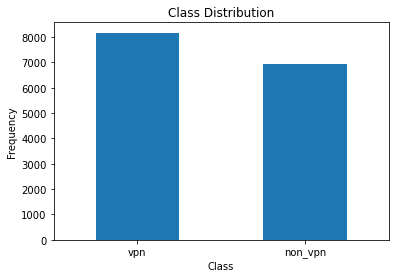

In [8]:
# Let's plot class against frequency
labels = ['vpn', 'non_vpn']
classes = all_data.Label.value_counts()
classes.plot(kind = 'bar',rot = 0)
plt.title("Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
# Check duplicate values
all_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15095    False
15096    False
15097    False
15098    False
15099    False
Length: 15100, dtype: bool

In [10]:
# duplicate = all_data[all_data.duplicated()]
# duplicate

## Data Cleaning

In [11]:
# Remove the rows with missing/NaN values
all_data=all_data.dropna()

In [12]:
#select all rows
#and eight to last column
all_data_min_max_scaled = all_data[all_data.columns[7:]]

In [13]:
all_data_min_max_scaled.Label.replace(('vpn', 'non_vpn'), (1, 0), inplace=True)
#all_data_min_max_scaled= all_data_min_max_scaled.drop('Fwd Seg Size Min', axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
# apply normalization techniques


for column in all_data_min_max_scaled.columns:
    all_data_min_max_scaled[column] = (all_data_min_max_scaled[column] - all_data_min_max_scaled[column].min()) / (all_data_min_max_scaled[column].max() - all_data_min_max_scaled[column].min())	

<ipython-input-14-174c3792bd4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_min_max_scaled[column] = (all_data_min_max_scaled[column] - all_data_min_max_scaled[column].min()) / (all_data_min_max_scaled[column].max() - all_data_min_max_scaled[column].min())


In [15]:
# view normalized data
all_data_min_max_scaled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.003421,0.000032,0.000000,5.325225e-07,5.365949e-07,0.008221,0.042308,0.016863,0.000000,0.000953,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.072049,0.000063,0.000096,7.406904e-06,6.439138e-06,0.079596,0.178846,0.117274,0.084086,0.004676,...,NaN,0.017017,0.000000,0.012543,0.019659,0.063191,0.000000,0.063191,0.063191,0.0
2,0.780684,0.005305,0.005380,3.839487e-04,4.749108e-04,0.043722,0.080769,0.072370,0.030534,0.007751,...,NaN,0.000193,0.000003,0.000144,0.000220,0.241041,0.024368,0.250022,0.223126,0.0
3,0.003423,0.000032,0.000000,5.325225e-07,5.365949e-07,0.008221,0.042308,0.016863,0.000000,0.000953,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000003,0.000000,0.000032,0.000000e+00,4.268368e-06,0.000000,0.000000,0.000000,0.000000,0.006105,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [16]:
all_data_min_max_scaled = all_data_min_max_scaled.dropna(axis=1)


In [17]:
all_data_min_max_scaled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.003421,0.000032,0.000000,5.325225e-07,5.365949e-07,0.008221,0.042308,0.016863,0.000000,0.000953,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.072049,0.000063,0.000096,7.406904e-06,6.439138e-06,0.079596,0.178846,0.117274,0.084086,0.004676,...,0.000063,0.017017,0.000000,0.012543,0.019659,0.063191,0.000000,0.063191,0.063191,0.0
2,0.780684,0.005305,0.005380,3.839487e-04,4.749108e-04,0.043722,0.080769,0.072370,0.030534,0.007751,...,0.005307,0.000193,0.000003,0.000144,0.000220,0.241041,0.024368,0.250022,0.223126,0.0
3,0.003423,0.000032,0.000000,5.325225e-07,5.365949e-07,0.008221,0.042308,0.016863,0.000000,0.000953,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000003,0.000000,0.000032,0.000000e+00,4.268368e-06,0.000000,0.000000,0.000000,0.000000,0.006105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [18]:
corr_mat = all_data_min_max_scaled.corr()
corr_mat       #.to_csv('corr_matrix.csv')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Flow Duration,1.000000,0.188878,0.169113,0.078905,0.079233,0.378514,0.339584,0.310463,0.316712,0.137286,...,0.176568,0.384365,0.367818,0.412982,0.249920,0.698485,0.389298,0.734114,0.635184,-0.112355
Tot Fwd Pkts,0.188878,1.000000,0.942686,0.846808,0.742792,0.154114,0.050346,0.307172,0.057724,0.104790,...,0.964212,0.008731,0.010741,0.010589,0.002346,-0.015107,-0.003944,-0.014161,-0.015096,0.007914
Tot Bwd Pkts,0.169113,0.942686,1.000000,0.729477,0.874283,0.138995,0.039132,0.247397,0.053999,0.131915,...,0.860391,0.004386,0.007661,0.006526,-0.002198,-0.017054,-0.005463,-0.016382,-0.016783,0.024930
TotLen Fwd Pkts,0.078905,0.846808,0.729477,1.000000,0.660518,0.133665,0.037737,0.346098,0.053377,0.067039,...,0.877973,-0.000047,0.001658,0.000934,-0.001934,-0.007381,-0.002565,-0.007206,-0.007182,-0.009755
TotLen Bwd Pkts,0.079233,0.742792,0.874283,0.660518,1.000000,0.104210,0.020551,0.187494,0.037359,0.148469,...,0.615046,-0.004936,-0.003174,-0.004322,-0.005088,-0.015514,-0.007090,-0.015766,-0.014577,0.020727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.698485,-0.015107,-0.017054,-0.007381,-0.015514,0.250704,0.353507,0.211932,0.205130,0.071670,...,-0.011468,0.125196,0.077259,0.104296,0.123699,1.000000,0.320934,0.978798,0.976708,-0.127355
Idle Std,0.389298,-0.003944,-0.005463,-0.002565,-0.007090,0.189859,0.026209,0.109405,0.182958,0.056561,...,-0.003421,0.149258,0.154180,0.154919,0.092135,0.320934,1.000000,0.496943,0.115583,-0.039124
Idle Max,0.734114,-0.014161,-0.016382,-0.007206,-0.015766,0.282223,0.327665,0.224184,0.238714,0.083908,...,-0.010908,0.161291,0.120444,0.147487,0.139774,0.978798,0.496943,1.000000,0.915207,-0.126615
Idle Min,0.635184,-0.015096,-0.016783,-0.007182,-0.014577,0.212027,0.366829,0.193790,0.166005,0.059393,...,-0.011326,0.093438,0.041335,0.068972,0.107291,0.976708,0.115583,0.915207,1.000000,-0.125538


In [19]:
part_1= all_data_min_max_scaled[all_data_min_max_scaled.columns[0:10]]
part_1['Label']=all_data_min_max_scaled['Label']

<ipython-input-19-699e16f3763f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_1['Label']=all_data_min_max_scaled['Label']


In [20]:
part_1.corr(method ='pearson')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Label
Flow Duration,1.000000,0.188878,0.169113,0.078905,0.079233,0.378514,0.339584,0.310463,0.316712,0.137286,-0.112355
Tot Fwd Pkts,0.188878,1.000000,0.942686,0.846808,0.742792,0.154114,0.050346,0.307172,0.057724,0.104790,0.007914
Tot Bwd Pkts,0.169113,0.942686,1.000000,0.729477,0.874283,0.138995,0.039132,0.247397,0.053999,0.131915,0.024930
TotLen Fwd Pkts,0.078905,0.846808,0.729477,1.000000,0.660518,0.133665,0.037737,0.346098,0.053377,0.067039,-0.009755
TotLen Bwd Pkts,0.079233,0.742792,0.874283,0.660518,1.000000,0.104210,0.020551,0.187494,0.037359,0.148469,0.020727
Fwd Pkt Len Max,0.378514,0.154114,0.138995,0.133665,0.104210,1.000000,0.028657,0.721617,0.945890,0.442715,0.007955
Fwd Pkt Len Min,0.339584,0.050346,0.039132,0.037737,0.020551,0.028657,1.000000,0.281737,-0.087976,-0.111876,-0.382019
Fwd Pkt Len Mean,0.310463,0.307172,0.247397,0.346098,0.187494,0.721617,0.281737,1.000000,0.622672,0.286751,-0.074577
Fwd Pkt Len Std,0.316712,0.057724,0.053999,0.053377,0.037359,0.945890,-0.087976,0.622672,1.000000,0.409597,0.043545
Bwd Pkt Len Max,0.137286,0.104790,0.131915,0.067039,0.148469,0.442715,-0.111876,0.286751,0.409597,1.000000,0.217956


#### Here we can see that only correlated features with Label is Fwd Pkt len Min

In [21]:
part_2=all_data_min_max_scaled[all_data_min_max_scaled.columns[10:20]]
part_2['label']=all_data_min_max_scaled['Label']

<ipython-input-21-580223af1f26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_2['label']=all_data_min_max_scaled['Label']


In [22]:
part_2.corr()

,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,label
Bwd Pkt Len Min,1.000000,0.072568,-0.018408,0.066991,-0.042765,0.241277,0.113729,0.141589,0.212781,0.070154,0.006103
Bwd Pkt Len Mean,0.072568,1.000000,0.562231,0.060944,-0.038199,-0.045647,-0.020722,-0.004766,-0.030811,0.045294,0.292799
Bwd Pkt Len Std,-0.018408,0.562231,1.000000,0.091245,-0.040570,-0.124733,-0.030800,0.002291,-0.101475,0.042912,0.411395
Flow Byts/s,0.066991,0.060944,0.091245,1.000000,0.853951,-0.046574,-0.045253,-0.061131,-0.031370,-0.062169,0.117327
Flow Pkts/s,-0.042765,-0.038199,-0.040570,0.853951,1.000000,-0.025251,-0.024544,-0.033223,-0.017009,-0.035240,0.017847
Flow IAT Mean,0.241277,-0.045647,-0.124733,-0.046574,-0.025251,1.000000,0.396102,0.692409,0.901996,0.326010,-0.175735
Flow IAT Std,0.113729,-0.020722,-0.030800,-0.045253,-0.024544,0.396102,1.000000,0.824619,-0.018712,0.428927,-0.091850
Flow IAT Max,0.141589,-0.004766,0.002291,-0.061131,-0.033223,0.692409,0.824619,1.000000,0.418510,0.592261,-0.133968
Flow IAT Min,0.212781,-0.030811,-0.101475,-0.031370,-0.017009,0.901996,-0.018712,0.418510,1.000000,0.171903,-0.149502
Fwd IAT Tot,0.070154,0.045294,0.042912,-0.062169,-0.035240,0.326010,0.428927,0.592261,0.171903,1.000000,-0.080133


#### Here we can see that correlated features with Label is Bwd Pkt Len Mean,Bwd Pkt Len std

In [23]:
part_3=all_data_min_max_scaled[all_data_min_max_scaled.columns[20:30]]
part_3['label']=all_data_min_max_scaled['Label']

<ipython-input-23-6cd4e376a20d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_3['label']=all_data_min_max_scaled['Label']


In [24]:
part_3.corr()

,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,label
Fwd IAT Mean,1.000000,0.384749,0.722792,0.909912,0.313788,0.512597,0.409755,0.384364,0.182390,0.078550,-0.128507
Fwd IAT Std,0.384749,1.000000,0.783305,-0.010069,0.307827,0.241822,0.382994,0.450027,0.010512,0.143251,-0.071397
Fwd IAT Max,0.722792,0.783305,1.000000,0.490528,0.489642,0.417049,0.506351,0.631259,0.098342,0.177646,-0.101399
Fwd IAT Min,0.909912,-0.010069,0.490528,1.000000,0.232650,0.451268,0.303098,0.269942,0.193567,0.028437,-0.102122
Bwd IAT Tot,0.313788,0.307827,0.489642,0.232650,1.000000,0.570616,0.590065,0.721021,0.151444,0.347730,0.067675
Bwd IAT Mean,0.512597,0.241822,0.417049,0.451268,0.570616,1.000000,0.818501,0.758631,0.477598,0.199220,0.006247
Bwd IAT Std,0.409755,0.382994,0.506351,0.303098,0.590065,0.818501,1.000000,0.902102,0.013938,0.245642,0.009840
Bwd IAT Max,0.384364,0.450027,0.631259,0.269942,0.721021,0.758631,0.902102,1.000000,0.185674,0.293312,0.030744
Bwd IAT Min,0.182390,0.010512,0.098342,0.193567,0.151444,0.477598,0.013938,0.185674,1.000000,0.031415,0.005829
Bwd PSH Flags,0.078550,0.143251,0.177646,0.028437,0.347730,0.199220,0.245642,0.293312,0.031415,1.000000,0.029910


#### Here we can see that correlated feature with Label is

In [25]:
part_4=all_data_min_max_scaled[all_data_min_max_scaled.columns[30:40]]
part_4['Label']=all_data_min_max_scaled['Label']


<ipython-input-25-f29531d9ee0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_4['Label']=all_data_min_max_scaled['Label']


In [26]:
part_4.corr()

,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,Label
Fwd Header Len,1.000000,0.860671,-0.006472,-0.007423,-0.044408,0.159875,0.361216,0.212432,0.158337,-0.012358,0.043539
Bwd Header Len,0.860671,1.000000,-0.007432,-0.008042,-0.059129,0.185086,0.420759,0.258674,0.193383,-0.012892,0.056413
Fwd Pkts/s,-0.006472,-0.007432,1.000000,0.618719,-0.093489,-0.043425,-0.054792,-0.052863,-0.019422,-0.014303,0.008313
Bwd Pkts/s,-0.007423,-0.008042,0.618719,1.000000,-0.058386,-0.029116,-0.034196,-0.028165,-0.015577,0.052114,0.020450
Pkt Len Min,-0.044408,-0.059129,-0.093489,-0.058386,1.000000,-0.108155,0.069945,-0.118637,-0.124788,-0.157657,-0.005203
Pkt Len Max,0.159875,0.185086,-0.043425,-0.029116,-0.108155,1.000000,0.657163,0.856212,0.867622,-0.078031,0.207545
Pkt Len Mean,0.361216,0.420759,-0.054792,-0.034196,0.069945,0.657163,1.000000,0.872511,0.644042,-0.105922,0.294382
Pkt Len Std,0.212432,0.258674,-0.052863,-0.028165,-0.118637,0.856212,0.872511,1.000000,0.764505,-0.098516,0.389511
Pkt Len Var,0.158337,0.193383,-0.019422,-0.015577,-0.124788,0.867622,0.644042,0.764505,1.000000,-0.032599,0.100813
FIN Flag Cnt,-0.012358,-0.012892,-0.014303,0.052114,-0.157657,-0.078031,-0.105922,-0.098516,-0.032599,1.000000,0.011279


#### Here we can see that correlated feature with Label is Pkt Len Mean,Pkt Len Std

In [27]:
part_5=all_data_min_max_scaled[all_data_min_max_scaled.columns[40:50]]
part_5['Label']=all_data_min_max_scaled['Label']

<ipython-input-27-df9b1c1d01a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_5['Label']=all_data_min_max_scaled['Label']


In [28]:
part_5.corr()

,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Label
SYN Flag Cnt,1.000000,-0.045116,-0.072073,-0.112064,0.203101,0.381271,0.328761,0.417230,0.070350,0.025037,0.073882
RST Flag Cnt,-0.045116,1.000000,-0.040238,-0.062565,0.040715,-0.135693,-0.050208,-0.093602,-0.012035,-0.004928,0.084379
PSH Flag Cnt,-0.072073,-0.040238,1.000000,0.643136,0.218465,-0.028635,0.115215,-0.024949,-0.006097,-0.004316,0.029910
ACK Flag Cnt,-0.112064,-0.062565,0.643136,1.000000,0.188426,-0.164150,0.038628,-0.099404,-0.019017,-0.009245,0.030476
Down/Up Ratio,0.203101,0.040715,0.218465,0.188426,1.000000,-0.151213,0.107841,-0.032483,0.029495,-0.007553,-0.413491
Pkt Size Avg,0.381271,-0.135693,-0.028635,-0.164150,-0.151213,1.000000,0.348440,0.900044,0.234173,0.175852,0.368339
Fwd Seg Size Avg,0.328761,-0.050208,0.115215,0.038628,0.107841,0.348440,1.000000,0.052147,0.307172,0.346098,-0.074577
Bwd Seg Size Avg,0.417230,-0.093602,-0.024949,-0.099404,-0.032483,0.900044,0.052147,1.000000,0.182361,0.085616,0.292799
Subflow Fwd Pkts,0.070350,-0.012035,-0.006097,-0.019017,0.029495,0.234173,0.307172,0.182361,1.000000,0.846808,0.007914
Subflow Fwd Byts,0.025037,-0.004928,-0.004316,-0.009245,-0.007553,0.175852,0.346098,0.085616,0.846808,1.000000,-0.009755


#### Here we can see that correlated features with Label is Down/Up Ratio ,Pkt size avg

In [29]:
part_6=all_data_min_max_scaled[all_data_min_max_scaled.columns[50:63]]
part_6['Label']=all_data_min_max_scaled['Label']

<ipython-input-29-762f141372c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_6['Label']=all_data_min_max_scaled['Label']


In [30]:
part_6.corr()

,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Subflow Bwd Pkts,1.000000,0.874283,-0.012704,0.860391,0.004386,0.007661,0.006526,-0.002198,-0.017054,-0.005463,-0.016382,-0.016783,0.024930
Subflow Bwd Byts,0.874283,1.000000,-0.012227,0.615046,-0.004936,-0.003174,-0.004322,-0.005088,-0.015514,-0.007090,-0.015766,-0.014577,0.020727
Init Bwd Win Byts,-0.012704,-0.012227,1.000000,-0.008480,0.017815,0.019913,0.019866,0.004647,0.084428,0.114902,0.104296,0.064452,-0.189716
Fwd Act Data Pkts,0.860391,0.615046,-0.008480,1.000000,0.007186,0.008133,0.008242,0.002866,-0.011468,-0.003421,-0.010908,-0.011326,-0.005859
Active Mean,0.004386,-0.004936,0.017815,0.007186,1.000000,0.774838,0.918134,0.831024,0.125196,0.149258,0.161291,0.093438,-0.049266
Active Std,0.007661,-0.003174,0.019913,0.008133,0.774838,1.000000,0.935795,0.322047,0.077259,0.154180,0.120444,0.041335,-0.025672
Active Max,0.006526,-0.004322,0.019866,0.008242,0.918134,0.935795,1.000000,0.589979,0.104296,0.154919,0.147487,0.068972,-0.041603
Active Min,-0.002198,-0.005088,0.004647,0.002866,0.831024,0.322047,0.589979,1.000000,0.123699,0.092135,0.139774,0.107291,-0.056302
Idle Mean,-0.017054,-0.015514,0.084428,-0.011468,0.125196,0.077259,0.104296,0.123699,1.000000,0.320934,0.978798,0.976708,-0.127355
Idle Std,-0.005463,-0.007090,0.114902,-0.003421,0.149258,0.154180,0.154919,0.092135,0.320934,1.000000,0.496943,0.115583,-0.039124


#### Here we can see that correlated feature with Label is Init Bwd Win Byts

In [31]:
final_data=all_data_min_max_scaled[['Fwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Pkt Len Mean','Pkt Len Std','Down/Up Ratio','Init Bwd Win Byts']].copy()